# Testing test dataset for any trends, 
VADERS, Roberta from torch, and Pipeline with pretrained transformers and models

In [163]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('dark_background')

import nltk

In [173]:
#reading data, last four columns

df = pd.read_csv('test_new.csv', usecols = ['brand', 'review_title', 'review_text', 'review_rating'])
df = df.head(250)
df.shape

(250, 4)

Text(0.5, 0, 'Review by numeric')

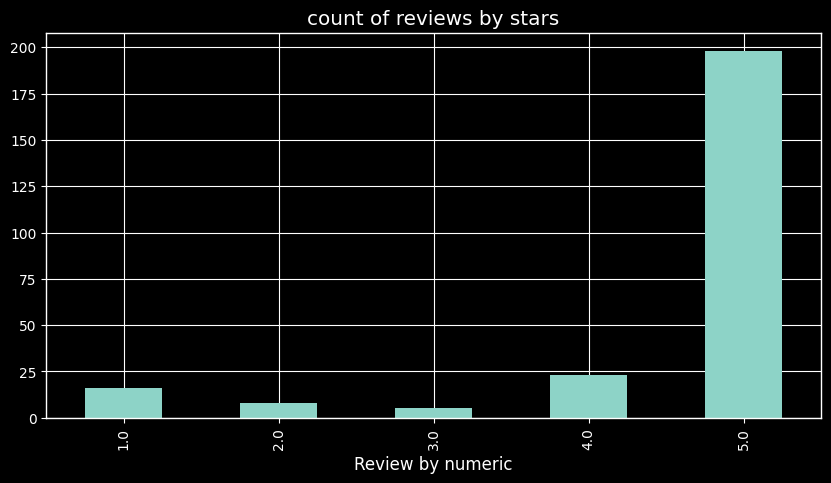

In [174]:
#quick eda

ax = df['review_rating'].value_counts().sort_index(). \
    plot(kind='bar',
         title='count of reviews by stars',
         figsize=(10,5))
ax.set_xlabel('Review by numeric')

In [175]:
#preprocessing:
df['review_text'] = df['review_text'].str.replace(r'[^\w\s]', '', regex=True)
df['review_text'] = df['review_text'].str.lower()
df['review_text'] = df['review_text'].str.strip()
df['review_text'] = df['review_text'].str.replace(r'\s+', ' ', regex=True)
df['review_text'] = df['review_text'].str.replace(r'\d+', '', regex=True)
df = df.map(str)

# nltk simple simulation start // test out example with tokenziation and premade models

In [176]:
example = df['review_text'][0]
print(example)

tokens = nltk.word_tokenize(example)
print(tokens[10:])

i used to stay away from scented laundry products due to my childrenus sensitive skin but they are older now and i am slowly reintroducing products downyus smell is so fresh and pleasant it is not too overpowering and has not caused an issue with skin sensitivity it has made our clothes feel soft and clean i am back on the downy train this review was collected as part of a promotion
['to', 'my', 'childrenus', 'sensitive', 'skin', 'but', 'they', 'are', 'older', 'now', 'and', 'i', 'am', 'slowly', 'reintroducing', 'products', 'downyus', 'smell', 'is', 'so', 'fresh', 'and', 'pleasant', 'it', 'is', 'not', 'too', 'overpowering', 'and', 'has', 'not', 'caused', 'an', 'issue', 'with', 'skin', 'sensitivity', 'it', 'has', 'made', 'our', 'clothes', 'feel', 'soft', 'and', 'clean', 'i', 'am', 'back', 'on', 'the', 'downy', 'train', 'this', 'review', 'was', 'collected', 'as', 'part', 'of', 'a', 'promotion']


In [177]:
tagged = nltk.pos_tag(tokens)
print(tagged)

[('i', 'NN'), ('used', 'VBN'), ('to', 'TO'), ('stay', 'VB'), ('away', 'RB'), ('from', 'IN'), ('scented', 'VBN'), ('laundry', 'NN'), ('products', 'NNS'), ('due', 'JJ'), ('to', 'TO'), ('my', 'PRP$'), ('childrenus', 'NN'), ('sensitive', 'JJ'), ('skin', 'NN'), ('but', 'CC'), ('they', 'PRP'), ('are', 'VBP'), ('older', 'JJR'), ('now', 'RB'), ('and', 'CC'), ('i', 'VB'), ('am', 'VBP'), ('slowly', 'RB'), ('reintroducing', 'JJ'), ('products', 'NNS'), ('downyus', 'NN'), ('smell', 'NN'), ('is', 'VBZ'), ('so', 'RB'), ('fresh', 'JJ'), ('and', 'CC'), ('pleasant', 'JJ'), ('it', 'PRP'), ('is', 'VBZ'), ('not', 'RB'), ('too', 'RB'), ('overpowering', 'VBG'), ('and', 'CC'), ('has', 'VBZ'), ('not', 'RB'), ('caused', 'VBN'), ('an', 'DT'), ('issue', 'NN'), ('with', 'IN'), ('skin', 'JJ'), ('sensitivity', 'NN'), ('it', 'PRP'), ('has', 'VBZ'), ('made', 'VBN'), ('our', 'PRP$'), ('clothes', 'NNS'), ('feel', 'VBP'), ('soft', 'JJ'), ('and', 'CC'), ('clean', 'JJ'), ('i', 'NN'), ('am', 'VBP'), ('back', 'RB'), ('on', '

In [178]:
entities = nltk.chunk.ne_chunk(tagged)
entities.pprint

<bound method Tree.pprint of Tree('S', [('i', 'NN'), ('used', 'VBN'), ('to', 'TO'), ('stay', 'VB'), ('away', 'RB'), ('from', 'IN'), ('scented', 'VBN'), ('laundry', 'NN'), ('products', 'NNS'), ('due', 'JJ'), ('to', 'TO'), ('my', 'PRP$'), ('childrenus', 'NN'), ('sensitive', 'JJ'), ('skin', 'NN'), ('but', 'CC'), ('they', 'PRP'), ('are', 'VBP'), ('older', 'JJR'), ('now', 'RB'), ('and', 'CC'), ('i', 'VB'), ('am', 'VBP'), ('slowly', 'RB'), ('reintroducing', 'JJ'), ('products', 'NNS'), ('downyus', 'NN'), ('smell', 'NN'), ('is', 'VBZ'), ('so', 'RB'), ('fresh', 'JJ'), ('and', 'CC'), ('pleasant', 'JJ'), ('it', 'PRP'), ('is', 'VBZ'), ('not', 'RB'), ('too', 'RB'), ('overpowering', 'VBG'), ('and', 'CC'), ('has', 'VBZ'), ('not', 'RB'), ('caused', 'VBN'), ('an', 'DT'), ('issue', 'NN'), ('with', 'IN'), ('skin', 'JJ'), ('sensitivity', 'NN'), ('it', 'PRP'), ('has', 'VBZ'), ('made', 'VBN'), ('our', 'PRP$'), ('clothes', 'NNS'), ('feel', 'VBP'), ('soft', 'JJ'), ('and', 'CC'), ('clean', 'JJ'), ('i', 'NN'), 

In [179]:
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm
#progress bar

sia = SentimentIntensityAnalyzer()

print(example)
sia.polarity_scores(example)

i used to stay away from scented laundry products due to my childrenus sensitive skin but they are older now and i am slowly reintroducing products downyus smell is so fresh and pleasant it is not too overpowering and has not caused an issue with skin sensitivity it has made our clothes feel soft and clean i am back on the downy train this review was collected as part of a promotion


{'neg': 0.0, 'neu': 0.84, 'pos': 0.16, 'compound': 0.9243}

In [180]:
res = {}
res_numeric = {}
for i, row in tqdm(df.iterrows(), total=len(df)): 
    text = row['review_text']
    category = row['brand'] 
    res[category] = sia.polarity_scores(text)
    res_numeric[i+1] = sia.polarity_scores(text)

  0%|          | 0/250 [00:00<?, ?it/s]

In [181]:
vaders_res = pd.DataFrame(res).T
vaders = pd.DataFrame(res_numeric).T
vaders = vaders.reset_index().rename(columns={'index': 'id'})
vaders = vaders.iloc[:, :5]
vaders = pd.concat([df, vaders], axis=1)

In [182]:
#new dataset with sentimental columns added
vaders.head()

,brand,review_title,review_text,review_rating,id,neg,neu,pos,compound
0,Downy,Downy Softness,i used to stay away from scented laundry produ...,5.0,1,0.000,0.840,0.160,0.9243
1,Tide,nan,great item,5.0,2,0.000,0.196,0.804,0.6249
2,Cascade,Five Stars,arrived soon product is as expected,5.0,3,0.000,1.000,0.000,0.0000
3,Swiffer,Five Stars,yup these work well,5.0,4,0.000,0.588,0.412,0.2732
4,Swiffer,Too Costly Considering the Result.,if you have a relatively clean floor with a fe...,2.0,5,0.055,0.758,0.188,0.7184


In [183]:
#converingg review ratings to int values
vaders['review_rating'] = pd.to_numeric(vaders['review_rating'], errors='coerce')
vaders = vaders.sort_values('review_rating')

## VADERS Plot 

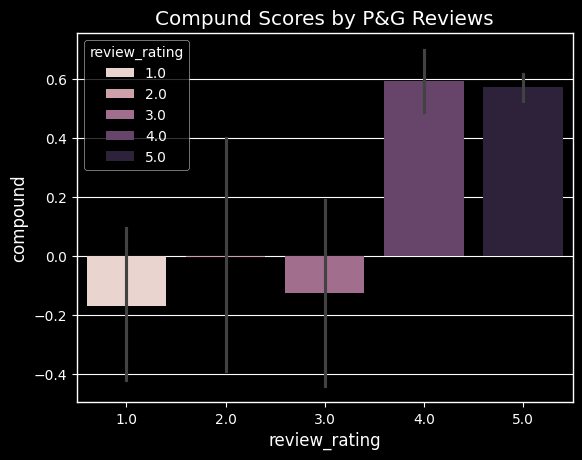

In [184]:
ax = sns.barplot(data=vaders, x='review_rating', y='compound', hue='review_rating')
ax.set_title('Compund Scores by P&G Reviews')
plt.show()

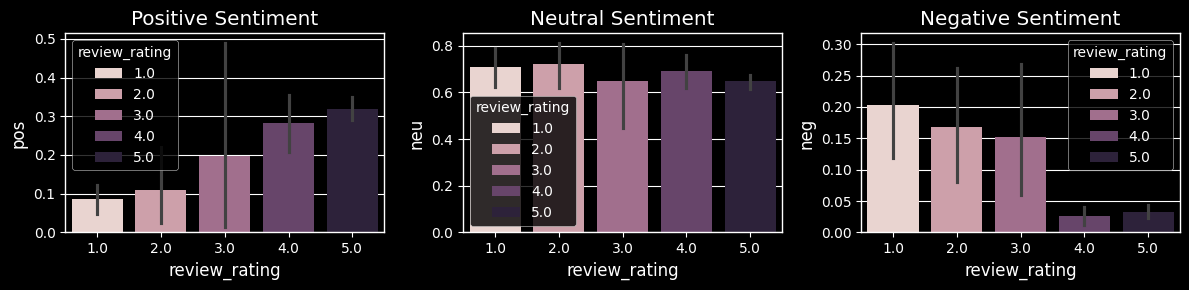

In [185]:
fig, axs = plt.subplots(1, 3, figsize=(12, 3))

sns.barplot(data=vaders, x='review_rating', y='pos', ax=axs[0], hue='review_rating')
sns.barplot(data=vaders, x='review_rating', y='neu', ax=axs[1], hue='review_rating')
sns.barplot(data=vaders, x='review_rating', y='neg', ax=axs[2], hue='review_rating')
axs[0].set_title('Positive Sentiment')
axs[1].set_title('Neutral Sentiment')
axs[2].set_title('Negative Sentiment')
plt.tight_layout()
plt.show()

# Roberta Pre-trained model 

In [186]:
from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification
from scipy.special import softmax

In [187]:
MODEL = f"cardiffnlp/twitter-roberta-base-sentiment"
tokenizer = AutoTokenizer.from_pretrained(MODEL)
model = AutoModelForSequenceClassification.from_pretrained(MODEL)

In [188]:
#VADER 
print(example)
sia.polarity_scores(example)

i used to stay away from scented laundry products due to my childrenus sensitive skin but they are older now and i am slowly reintroducing products downyus smell is so fresh and pleasant it is not too overpowering and has not caused an issue with skin sensitivity it has made our clothes feel soft and clean i am back on the downy train this review was collected as part of a promotion


{'neg': 0.0, 'neu': 0.84, 'pos': 0.16, 'compound': 0.9243}

In [189]:
#ROBERTA with transformer applying to example of our dataset
encoded_text = tokenizer(example, return_tensors='pt')
output = model(**encoded_text)
scores = output[0][0].detach().numpy()
scores = softmax(scores)
scores
# 3 different values in numpy array instead 
scores_dict = {
    'roberta_neg' : scores[0],
    'roberta_neu' : scores[1],
    'roberta_pos' : scores[2]
}
scores_dict

{'roberta_neg': np.float32(0.013715677),
 'roberta_neu': np.float32(0.115414284),
 'roberta_pos': np.float32(0.87087005)}

In [190]:
def polarity_scores_roberta(example):
    encoded_text = tokenizer(example, return_tensors='pt')
    output = model(**encoded_text)
    scores = output[0][0].detach().numpy()
    scores = softmax(scores)
    scores
    # 3 different values in numpy array instead 
    scores_dict = {
        'roberta_neg' : scores[0],
        'roberta_neu' : scores[1],
        'roberta_pos' : scores[2]
    }
    return scores_dict

In [191]:
res = {} 
for i, row in tqdm(df.iterrows(), total=len(df)): 
    try:
        text = row['review_text']
        vader_numeric = sia.polarity_scores(text)
        roberta_numeric = polarity_scores_roberta(text)
        vader_numeric_rename = {}
        num = i+1
        for key, value in vader_numeric.items():
            vader_numeric_rename[f"vader_{key}"] = value
        both = {**vader_numeric_rename, **roberta_numeric}
        res[num] = both
    except RuntimeError:
        print(f'broke for review {text}')
    if i == 250: 
        break

  0%|          | 0/250 [00:00<?, ?it/s]

In [192]:
results_df = pd.DataFrame(res).T
results_df = results_df.reset_index().rename(columns={'index': 'id'})
results_df = pd.concat([df, results_df], axis=1)

In [193]:
results_df.head()

,brand,review_title,review_text,review_rating,id,vader_neg,vader_neu,vader_pos,vader_compound,roberta_neg,roberta_neu,roberta_pos
0,Downy,Downy Softness,i used to stay away from scented laundry produ...,5.0,1,0.000,0.840,0.160,0.9243,0.013716,0.115414,0.870870
1,Tide,nan,great item,5.0,2,0.000,0.196,0.804,0.6249,0.006715,0.066720,0.926564
2,Cascade,Five Stars,arrived soon product is as expected,5.0,3,0.000,1.000,0.000,0.0000,0.006330,0.332023,0.661647
3,Swiffer,Five Stars,yup these work well,5.0,4,0.000,0.588,0.412,0.2732,0.003548,0.064545,0.931907
4,Swiffer,Too Costly Considering the Result.,if you have a relatively clean floor with a fe...,2.0,5,0.055,0.758,0.188,0.7184,0.410421,0.487123,0.102456


In [194]:
results_df.columns

Index(['brand', 'review_title', 'review_text', 'review_rating', 'id',
       'vader_neg', 'vader_neu', 'vader_pos', 'vader_compound', 'roberta_neg',
       'roberta_neu', 'roberta_pos'],
      dtype='object')

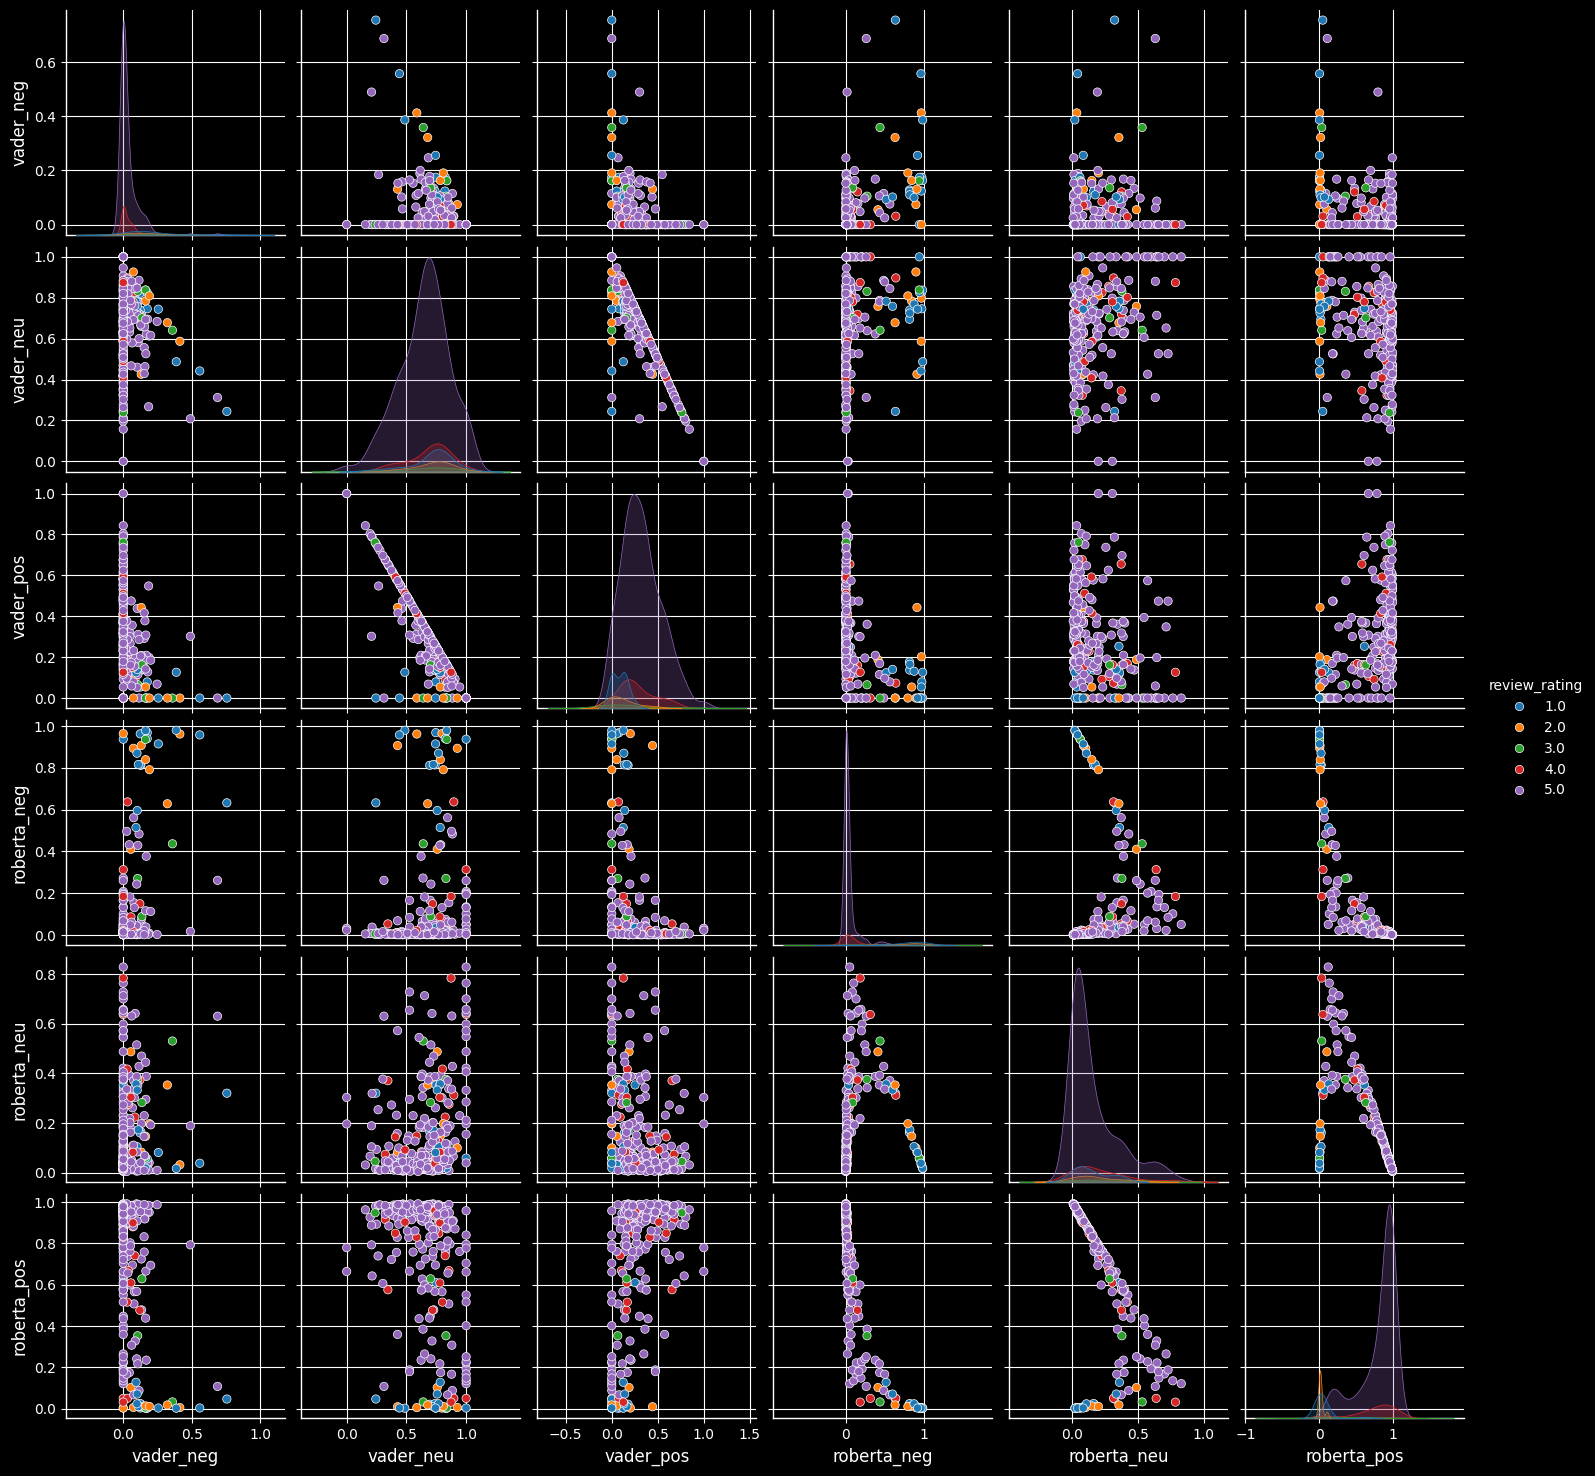

In [218]:
sns.pairplot(data=results_df, vars=['vader_neg', 'vader_neu', 'vader_pos', 'roberta_neg',
       'roberta_neu', 'roberta_pos'], hue='review_rating', palette='tab10')
plt.show()

# Review Examples (sentiment error)

In [219]:
results_df['review_rating'] = pd.to_numeric(results_df['review_rating'], errors='coerce')
results_df.query('review_rating == 1') \
    .sort_values('roberta_pos', ascending=False)['review_text'].values[1]

'after reviewing its instructions it says you can use any water temperature i usually use hot water to do my laundry and it doesnt say anything that you cant use hot water for pods after the laundry i was surprised that the plastic residue sticked on my under armour shirt which costs  and to my wifes old navy shirt which costs around  i love tide pods but definitely this experience kind of scared me because i have precious clothes that i dont want to be damaged will be switching to different brands'

In [220]:
results_df.query('review_rating == 1') \
    .sort_values('vader_pos', ascending=False)['review_text'].values[1]

'nothing holds the bottle of solution in it fell out and really hurt my big toe was supposed to make life easier junk'

In [221]:
results_df.query('review_rating == 5') \
    .sort_values('roberta_neg', ascending=False)['review_text'].values[0]

'i know and trust swiffer products to be as advertised however i did not know that there are different types of swiffer mop handles be sure you check which swiffer refills fit your swiffer mop i ordered the wrong refill for my mop it is not impossible to use with my mop but it is difficult and aggravation since the mop head wont stay of the mop'

In [222]:
results_df.query('review_rating == 5') \
    .sort_values('vader_neg', ascending=False)['review_text'].values[0]

'no comment'

# Sentiement pipeline

In [223]:
from transformers import pipeline

sent_pipeline = pipeline("sentiment-analysis")

No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision 714eb0f (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
Device set to use mps:0


In [224]:
sent_pipeline(example)

[{'label': 'POSITIVE', 'score': 0.9540150165557861}]

In [225]:
example

'i used to stay away from scented laundry products due to my childrenus sensitive skin but they are older now and i am slowly reintroducing products downyus smell is so fresh and pleasant it is not too overpowering and has not caused an issue with skin sensitivity it has made our clothes feel soft and clean i am back on the downy train this review was collected as part of a promotion'

In [226]:
sent_pipeline("if only I had something to magically make these tie-pods work. \
These work as good as magic. Good thing magic isn't real!")

[{'label': 'POSITIVE', 'score': 0.9970754384994507}]

In [227]:
sent_pipeline("I hate tie-pods for the life of me, I hate everything about them!")

[{'label': 'NEGATIVE', 'score': 0.9985942244529724}]

In [228]:
sent_pipeline("wow really huh")

[{'label': 'POSITIVE', 'score': 0.9990172386169434}]